**Import necessary packages**

In [291]:
#Import necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MultiLabelBinarizer
import statistics

**Import raw data**

In [292]:
#Import user_ratings 
user_ratings = pd.read_csv('./raw_data/user_ratings.csv')

In [293]:
#Import movies_metadata
movies_overview = pd.read_csv('./raw_data/movies_overview.csv')

In [294]:
#Import movies data
movies = pd.read_csv('./raw_data/movies.csv')

**General review of raw data - 1st few observations, correct datatypes, no null values**

In [295]:
#Review 1st few observations of each dataframe
user_ratings.head()

,userId,movieId,rating
0,1,1,4.0
1,5,1,4.0
2,7,1,4.5
3,15,1,2.5
4,17,1,4.5


In [296]:
movies_overview.head()

,title,overview
0,Toy Story,"Led by Woody, Andy's toys live happily in his ..."
1,Jumanji,When siblings Judy and Peter discover an encha...
2,Grumpier Old Men,A family wedding reignites the ancient feud be...
3,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom..."
4,Father of the Bride Part II,Just when George Banks has recovered from his ...


In [297]:
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [298]:
#Review user_ratings using .info()
user_ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 3 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   userId   100836 non-null  int64  
 1   movieId  100836 non-null  int64  
 2   rating   100836 non-null  float64
dtypes: float64(1), int64(2)
memory usage: 2.3 MB


In [299]:
#Review .info() on df
movies_overview.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45466 entries, 0 to 45465
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   title     45460 non-null  object
 1   overview  44512 non-null  object
dtypes: object(2)
memory usage: 710.5+ KB


In [300]:
#Remove missing values from movies_overview df
movies_overview = movies_overview.dropna()

In [301]:
#Check movies_overview again using info() to be sure all nulls have been removed
movies_overview.info()

<class 'pandas.core.frame.DataFrame'>
Index: 44506 entries, 0 to 45465
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   title     44506 non-null  object
 1   overview  44506 non-null  object
dtypes: object(2)
memory usage: 1.0+ MB


In [302]:
#Review movies using .info()
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  9742 non-null   int64 
 1   title    9742 non-null   object
 2   genres   9742 non-null   object
dtypes: int64(1), object(2)
memory usage: 228.5+ KB


None of the dataframes contain null values, which is good. The datatypes for each column also look correct based on data values.

**Check each dataframe for duplicate observations**

In [303]:
#Create a boolean mask to filter user_ratings data to ensure no duplicate reviews exist for same userId, same movieId
users_dup_mask = user_ratings[['movieId', 'userId']].duplicated()

In [304]:
#Review user_ratings with duplicated mask
user_ratings[dup_mask]

,userId,movieId,rating


User ratings has no duplicate observations with movie reviews for same movie submitted by same user.

In [305]:
#Create a boolean mask to filter movies_overview for unique 'title' values
movies_dup_mask = movies_overview[['title']].duplicated()

In [306]:
#Review movies_overview with duplicated mask
movies_overview[movies_dup_mask]

,title,overview
888,Sabrina,Linus and David Larrabee are the two sons of a...
930,The Scarlet Letter,"In Puritan Boston, seamstress Hester Prynne is..."
1296,Cape Fear,Sam Bowden witnesses a rape committed by Max C...
1465,The Promise,"East-Berlin, 1961, shortly after the erection ..."
1644,The Postman,"In 2013 there are no highways, no I-ways, no d..."
...,...,...
45421,Pickpocket,Little pocket thief Wu never got away from the...
45453,Mom,The bliss of a biology teacher’s family life i...
45454,The Morning After,The Morning After is a feature film that consi...
45460,Robin Hood,"Yet another version of the classic epic, with ..."


It does appear that are several plot overviews attributed to movies with the same name. These may be referring to different movies however, we don't have a movieId or any other movie attribute data to confirm. To be safe, we will drop all these duplicated movie observations.

In [307]:
#Keep only observations that don't have duplicate title names 
movies_overview_clean = movies_overview[~movies_dup_mask]

In [308]:
#Review using .info()
movies_overview_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 41369 entries, 0 to 45465
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   title     41369 non-null  object
 1   overview  41369 non-null  object
dtypes: object(2)
memory usage: 969.6+ KB


In [309]:
#Create duplicated movie titles mask to use on movies df
movies_dup_mask = movies[['title']].duplicated()

In [310]:
#Review movies with duplicate titles in movies df using mask
movies[movies_dup_mask]

,movieId,title,genres
5601,26958,Emma (1996),Romance
6932,64997,War of the Worlds (2005),Action|Sci-Fi
9106,144606,Confessions of a Dangerous Mind (2002),Comedy|Crime|Drama|Romance|Thriller
9135,147002,Eros (2004),Drama|Romance
9468,168358,Saturn 3 (1980),Sci-Fi|Thriller


In [311]:
#Drop duplicate observations
movies_clean = movies[~movies_dup_mask]

**Cleaning up movies df - 'title' & 'genre' columns**

It looks like the 'title' & 'genres' column of the movies dataframe need to be cleaned up though. 

We want to split up the 'title' objects so the 'title' values only include name of the movie & the 'year" appended to the title is moved to a separate year column.

For the 'genres' column we should split up the 'genres' & encode one genre per column.

In [312]:
#Clean up 'title' column in movies dataframe 

#Extract the year at the end of each value in 'title' column & add as a new column 'year'
movies_clean['year'] = movies_clean.title.str.extract("(?<=\()(.*?)(?=\)$)")

#Remove the (year) at the end of each 'title'
movies_clean['title'] = movies_clean.title.str.replace(r"\(.*\)","", regex= True)

#Remove leading and trailing white space from 'title' column
movies_clean['title'] = movies_clean['title'].apply(lambda x: x.strip())

C:\Users\jlmar\AppData\Local\Temp\ipykernel_6828\2348418880.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies_clean['year'] = movies_clean.title.str.extract("(?<=\()(.*?)(?=\)$)")
C:\Users\jlmar\AppData\Local\Temp\ipykernel_6828\2348418880.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies_clean['title'] = movies_clean.title.str.replace(r"\(.*\)","", regex= True)
C:\Users\jlmar\AppData\Local\Temp\ipykernel_6828\2348418880.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy

In [313]:
#Review the changes in movies df
movies_clean.head()

,movieId,title,genres,year
0,1,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,1995
1,2,Jumanji,Adventure|Children|Fantasy,1995
2,3,Grumpier Old Men,Comedy|Romance,1995
3,4,Waiting to Exhale,Comedy|Drama|Romance,1995
4,5,Father of the Bride Part II,Comedy,1995


In [314]:
#After splitting movie title & year- make sure that there are no title duplicates - this can make downstream analysis confusing
movies_split_dup_mask = movies_clean[['title']].duplicated()

In [315]:
#Does appear like there are movie remakes in this list - i.e. movies with same title but different year
#To avoid confusion later on, let's drop the duplicate values
movies_clean[movies_split_dup_mask]

,movieId,title,genres,year
697,915,Sabrina,Comedy|Romance,1954
1032,1344,Cape Fear,Crime|Drama|Thriller,1962
1293,1726,"Postman, The",Action|Adventure|Drama|Sci-Fi,1997
1369,1873,"Misérables, Les",Crime|Drama|Romance|War,1998
1419,1941,Hamlet,Drama,1948
...,...,...,...,...
9606,176413,Bliss,Drama,2012
9620,177763,Murder on the Orient Express,Crime|Drama|Mystery,2017
9691,184349,Elsa & Fred,Comedy|Drama|Romance,2005
9696,184931,Death Wish,Action|Crime|Drama|Thriller,2018


In [316]:
#Drop movie titles with duplicates
movies_clean = movies_clean[~movies_split_dup_mask]

In [317]:
#Recheck using .info()
movies_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9412 entries, 0 to 9741
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  9412 non-null   int64 
 1   title    9412 non-null   object
 2   genres   9412 non-null   object
 3   year     9389 non-null   object
dtypes: int64(1), object(3)
memory usage: 367.7+ KB


In [318]:
#Looks like some of the year observations weren't populated - i.e. not every movie title had a year with it
#Let's drop the year column for simplicity - we won't need it
movies_clean = movies_clean.drop(columns = 'year')

In [319]:
#Review 1st few observations
movies_clean.head()

,movieId,title,genres
0,1,Toy Story,Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji,Adventure|Children|Fantasy
2,3,Grumpier Old Men,Comedy|Romance
3,4,Waiting to Exhale,Comedy|Drama|Romance
4,5,Father of the Bride Part II,Comedy


In [320]:
#Split the genres values by separator = "|"
movies_clean['genres'] = movies_clean['genres'].str.split("|", expand = False)

In [321]:
#Encode each genre value as a separate column

#Create MultiLabelBinarizer object
mlb = MultiLabelBinarizer()

#Create array using mlb attribute to on a numpy array of just the genres column of the movies dataframe
array = mlb.fit_transform(movies_clean.genres.to_numpy())

#Create a dataframe with column names being the genre classes
genres_df = pd.DataFrame(array, index = movies_clean.index, columns = mlb.classes_)

In [322]:
#Review genres_df to ensure labelling of different classes occurred correctly
genres_df

,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,0,0,1,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9737,0,1,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
9738,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
9739,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
9740,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [323]:
#Combine the original movies df with new genres_df

#Combine 2 df's and drop the 'genres' column from the original movies df
movies_genres = pd.concat([movies_clean, genres_df], axis = 1).drop(columns = 'genres')

In [324]:
#Review movies_genres
movies_genres.head()

,movieId,title,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,...,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story,0,0,1,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,Jumanji,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,Grumpier Old Men,0,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
3,4,Waiting to Exhale,0,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
4,5,Father of the Bride Part II,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [325]:
#Check the shape of movies_genres
movies_genres.shape

(9412, 22)

**Join movies to user_ratings df on 'movieId'**

We will be interested in later diving into the ratings that different users gave movies, however currently the user_ratings df doesn't have the movie 'title' included in each observation, only the 'movie_Id'. To make this data easier to interpret later, let's add a column for movie titles to the user_ratings df called 'title.

In [326]:
#Slice to 'movieId' & 'title' columns from movies
movies_slice = movies_clean.loc[:, ['movieId', 'title']]

In [327]:
#Join movies_slice to user_ratings on 'movieId'
user_ratings = user_ratings.merge(movies_slice, on = 'movieId', how = 'left')

In [328]:
#Check 1st few observations of user_ratings
user_ratings.head()

,userId,movieId,rating,title
0,1,1,4.0,Toy Story
1,5,1,4.0,Toy Story
2,7,1,4.5,Toy Story
3,15,1,2.5,Toy Story
4,17,1,4.5,Toy Story


In [329]:
#Check user_ratings using .info()
user_ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 4 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   userId   100836 non-null  int64  
 1   movieId  100836 non-null  int64  
 2   rating   100836 non-null  float64
 3   title    98539 non-null   object 
dtypes: float64(1), int64(2), object(1)
memory usage: 3.1+ MB


**Filter movies_overview & movies_genres for movies that we have ratings data for**

In [330]:
#Create a list of movie titles in user_ratings
user_ratings_movies = user_ratings.title.unique()

In [331]:
#Review list 
user_ratings_movies

array(['Toy Story', 'Grumpier Old Men', 'Heat', ..., 'Hazard',
       'Blair Witch', '31'], dtype=object)

In [332]:
#Review length of user_ratings_movies
len(user_ratings_movies)

9397

In [333]:
#Filter movies_overview_clean for movies in user ratings df
movies_overview_clean = movies_overview_clean[movies_overview_clean['title'].isin(user_ratings_movies)]

In [334]:
#Check new movies_overview_clean using .info()
movies_overview_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6917 entries, 0 to 45371
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   title     6917 non-null   object
 1   overview  6917 non-null   object
dtypes: object(2)
memory usage: 162.1+ KB


In [335]:
#Filter movies_genres for movies in user ratings df
movies_genres_clean = movies_genres[movies_genres['title'].isin(user_ratings_movies)]

In [336]:
#Check using movies_genres_clean using .info()
movies_genres_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9396 entries, 0 to 9741
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   movieId             9396 non-null   int64 
 1   title               9396 non-null   object
 2   (no genres listed)  9396 non-null   int32 
 3   Action              9396 non-null   int32 
 4   Adventure           9396 non-null   int32 
 5   Animation           9396 non-null   int32 
 6   Children            9396 non-null   int32 
 7   Comedy              9396 non-null   int32 
 8   Crime               9396 non-null   int32 
 9   Documentary         9396 non-null   int32 
 10  Drama               9396 non-null   int32 
 11  Fantasy             9396 non-null   int32 
 12  Film-Noir           9396 non-null   int32 
 13  Horror              9396 non-null   int32 
 14  IMAX                9396 non-null   int32 
 15  Musical             9396 non-null   int32 
 16  Mystery             9396 non-

It looks like the movies_overview data actually doesn't contain observations for every movie that is in the user ratings df. We should make things consistent & therefore, we will filter movies_genres & user_ratings data to only include the movies with plot overview data.

In [337]:
#Movies in movies_overview_clean
overview_movies = movies_overview_clean['title'].unique()

In [338]:
#Review length of movies with plot overviews list
len(overview_movies)

6917

In [339]:
#Filter user_ratings df to only include movies with plot overviews
user_ratings_clean = user_ratings[user_ratings['title'].isin(overview_movies)]

In [340]:
#Check using .info()
user_ratings_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 73503 entries, 0 to 100835
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   userId   73503 non-null  int64  
 1   movieId  73503 non-null  int64  
 2   rating   73503 non-null  float64
 3   title    73503 non-null  object 
dtypes: float64(1), int64(2), object(1)
memory usage: 2.8+ MB


In [341]:
#Filter movies_genres for movies with plot overview
movies_genres_clean = movies_genres_clean[movies_genres_clean['title'].isin(overview_movies)]

In [342]:
#Check using .info()
movies_genres_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6917 entries, 0 to 9716
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   movieId             6917 non-null   int64 
 1   title               6917 non-null   object
 2   (no genres listed)  6917 non-null   int32 
 3   Action              6917 non-null   int32 
 4   Adventure           6917 non-null   int32 
 5   Animation           6917 non-null   int32 
 6   Children            6917 non-null   int32 
 7   Comedy              6917 non-null   int32 
 8   Crime               6917 non-null   int32 
 9   Documentary         6917 non-null   int32 
 10  Drama               6917 non-null   int32 
 11  Fantasy             6917 non-null   int32 
 12  Film-Noir           6917 non-null   int32 
 13  Horror              6917 non-null   int32 
 14  IMAX                6917 non-null   int32 
 15  Musical             6917 non-null   int32 
 16  Mystery             6917 non-

**Join movies_genres data with plot overview data**

For simplicity with subsequent analysis, let's keep all of the movies data together. Here we will add the overview column to the movies genres data to get a complete movies_data df.

In [343]:
#Add plot overview data to movie_genres df
movie_data_clean = movies_overview_clean.merge(movies_genres_clean, on = 'title', how = 'left')

In [344]:
#Review using .info()
movie_data_clean

,title,overview,movieId,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,...,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,Toy Story,"Led by Woody, Andy's toys live happily in his ...",1,0,0,1,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
1,Jumanji,When siblings Judy and Peter discover an encha...,2,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Grumpier Old Men,A family wedding reignites the ancient feud be...,3,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
3,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",4,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
4,Father of the Bride Part II,Just when George Banks has recovered from his ...,5,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6912,Themroc,"Made without proper language, just gibberish a...",175705,0,0,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0
6913,A German Life,"Brunhilde Pomsel describes herself as an ""apol...",175707,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6914,Self-criticism of a Bourgeois Dog,A bourgeois dog confesses how he was transform...,175743,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
6915,Der Herr Karl,No overview found.,175781,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [345]:
#Review using .info()
movie_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6917 entries, 0 to 6916
Data columns (total 23 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   title               6917 non-null   object
 1   overview            6917 non-null   object
 2   movieId             6917 non-null   int64 
 3   (no genres listed)  6917 non-null   int32 
 4   Action              6917 non-null   int32 
 5   Adventure           6917 non-null   int32 
 6   Animation           6917 non-null   int32 
 7   Children            6917 non-null   int32 
 8   Comedy              6917 non-null   int32 
 9   Crime               6917 non-null   int32 
 10  Documentary         6917 non-null   int32 
 11  Drama               6917 non-null   int32 
 12  Fantasy             6917 non-null   int32 
 13  Film-Noir           6917 non-null   int32 
 14  Horror              6917 non-null   int32 
 15  IMAX                6917 non-null   int32 
 16  Musical             6917

**User Ratings - EDA**

In [346]:
#Determine number of movies reviewed by user
num_ratings_by_user = user_ratings_clean[['userId']].value_counts()

In [347]:
#Determine average number of movies reviewed by user
num_ratings_by_user_avg = num_ratings_by_user.mean()

#Review average ratings by user
print(num_ratings_by_user_avg)

120.49672131147541


In [348]:
#Determine median number of movies reviewed by user
num_ratings_by_user_median = statistics.median(num_ratings_by_user)

#Review average ratings by user
print(num_ratings_by_user_median)

54.0


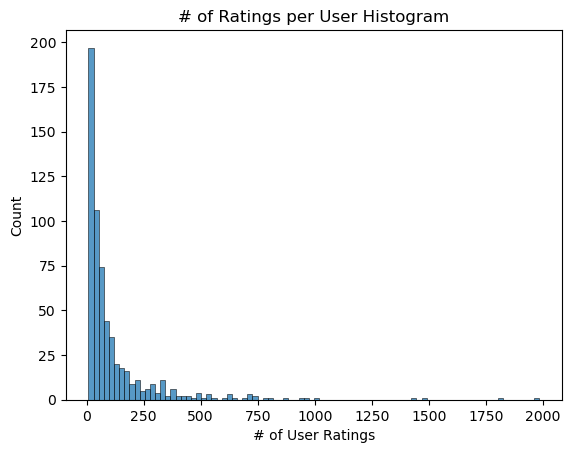

In [349]:
#Create a histogram to review & understand ratings per user
sns.histplot(num_ratings_by_user)
plt.title('# of Ratings per User Histogram')
plt.xlabel('# of User Ratings')
plt.ylabel('Count')
plt.show()

In [350]:
#Understand movies with most reviews
most_reviewed_movies = user_ratings_clean['title'].value_counts()

#Filter for top 25 most reviewed movies
top25_reviewed_movies = most_reviewed_movies.sort_values(ascending = False).head(25)

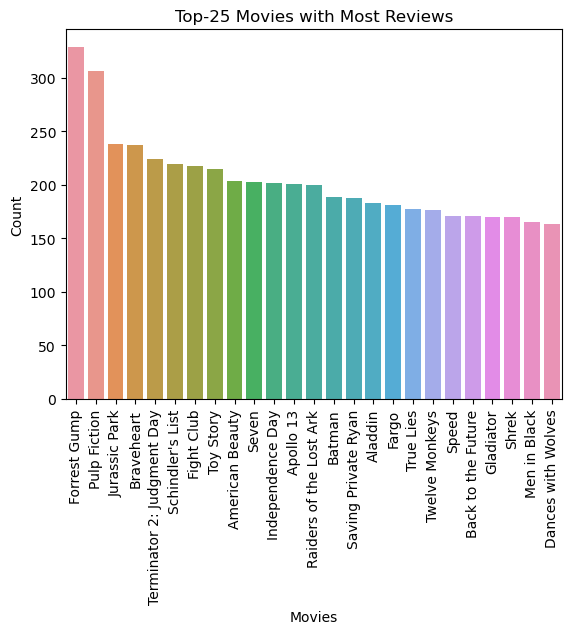

In [351]:
#Create a histogram to review movies with most reviews
sns.barplot( x = top25_reviewed_movies.index.values, y= top25_reviewed_movies.values)
plt.title('Top-25 Movies with Most Reviews')
plt.xlabel('Movies')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

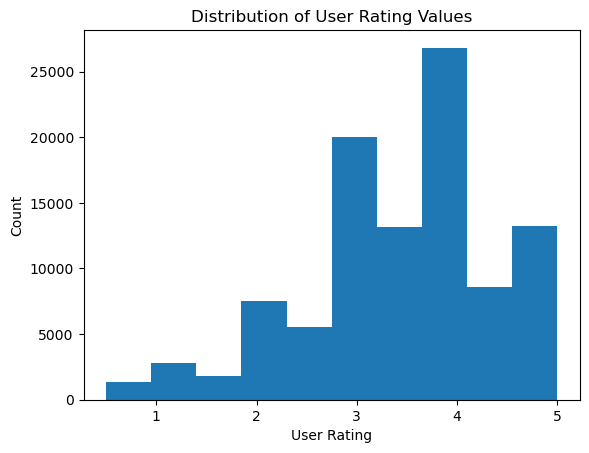

In [352]:
#Review distribution of user ratings

plt.hist(user_ratings['rating'])
plt.title('Distribution of User Rating Values')
plt.xlabel('User Rating')
plt.ylabel('Count')
plt.show()

**Review sparsity of user ratings matrix**

Concept of sparsity is important for quantifying the amount of aata in a matrix. It will be difficult to compare ratings other users for the same movie if not other users have rated this movie.

- Sparsity = (Empty Values/ Total Cells)

- Density = 1 - Sparsity

In [353]:
#Reshape the user ratings dataframe to get rows containing userIds & columns containing movie titles
user_ratings_pivot = user_ratings_clean.pivot_table(index = 'userId', columns = 'title', values = 'rating')

In [354]:
#Check shape of user_ratings_pivot
user_ratings_pivot.shape

(610, 6917)

In [355]:
#Calculate the sparsity of the user_ratings_pivot df

#Calculate the sum of null values in df
number_of_empty = user_ratings_pivot.isnull().values.sum()

#Calculate total number of cells in df
total_number = user_ratings_pivot.size

#Calculate the sparsity
sparsity = number_of_empty/total_number

#Review sparsity value
print('Sparsity: ', str(round(sparsity, 5)))

#Review density value
print('Density: ', str(round(1-(sparsity), 5)))

Sparsity:  0.98258
Density:  0.01742


This user_ratings_pivot matrix would be considered sparse as nearly 98% of of the possible data is missing and ~1.7% of the possible data is present. This is important to keep in mind for our KNeighbors algorithm, we are using other user's recommendations for the same movie to predict if the user in question who hasn't seen the movie would like it. If not many other users' ratings data is available, our predictions will suffer.

In [356]:
#Reviewing the sparsity per column
sparsity_cols = user_ratings_pivot.isnull().sum().sort_values(ascending = False)

#Make a dataframe to review number of missing values per column
sparsity_df = pd.DataFrame(sparsity_cols, columns = ['count of nulls'])

In [357]:
#Review sparsity_df
sparsity_df.head(50)

,count of nulls
title,
'71,609
My Afternoons with Margueritte,609
Dolls,609
Domestic Disturbance,609
Dominick and Eugene,609
Dominion: Prequel to the Exorcist,609
I'm Still Here,609
Don Camillo in Moscow,609
I'm Here,609


Unfortunately it looks like we have lots of sparse columns - at least 50 where only 1 user reviewed each movie. We will have to deal with this when we consider our recommendation system.

**Movie_Data EDA**

In [358]:
#Review 1st few observations of movies_data using .head()
movie_data_clean.head()

,title,overview,movieId,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,...,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,Toy Story,"Led by Woody, Andy's toys live happily in his ...",1,0,0,1,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
1,Jumanji,When siblings Judy and Peter discover an encha...,2,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Grumpier Old Men,A family wedding reignites the ancient feud be...,3,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
3,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",4,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
4,Father of the Bride Part II,Just when George Banks has recovered from his ...,5,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [359]:
#Check the distribution of length of plot overviews

#Create an empty list to hold lenghts of plot overviews
overview_lengths = []

for row in range(1, 6918):
    overview_lengths.append(len(movie_data_clean.loc[row - 1]['overview']))

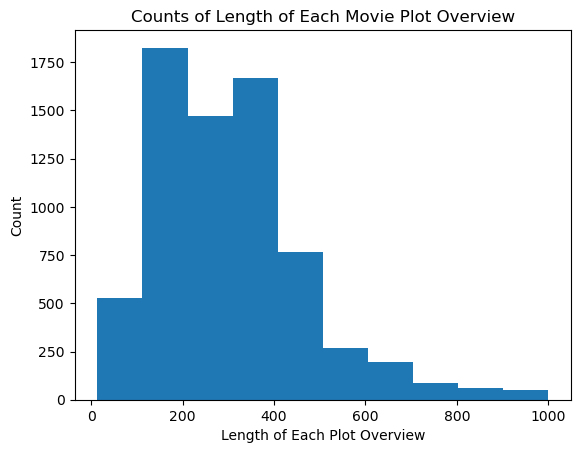

In [360]:
#Plot overview_lengths using a histogram
plt.hist(overview_lengths)
plt.title('Counts of Length of Each Movie Plot Overview')
plt.xlabel('Length of Each Plot Overview')
plt.ylabel('Count')
plt.show()

Most plot overviews fall somewhere between 200-600 characters but there is a wider range than expected.

In [361]:
#Create a list of cols of all movie genres
genre_cols = ['(no genres listed)', 'Action',
       'Adventure', 'Animation', 'Children', 'Comedy', 'Crime', 'Documentary',
       'Drama', 'Fantasy', 'Film-Noir', 'Horror', 'IMAX', 'Musical', 'Mystery',
       'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western']

In [362]:
#Create an empty dictionary to house each genre col name & # of nonzero values it contains
genre_counts = {}

#For loop to create genre column & count of observations for movies of that genre in movies_data
for col in genre_cols:
    genre_counts[col] = movie_data_clean[col].astype(bool).sum(axis=0)

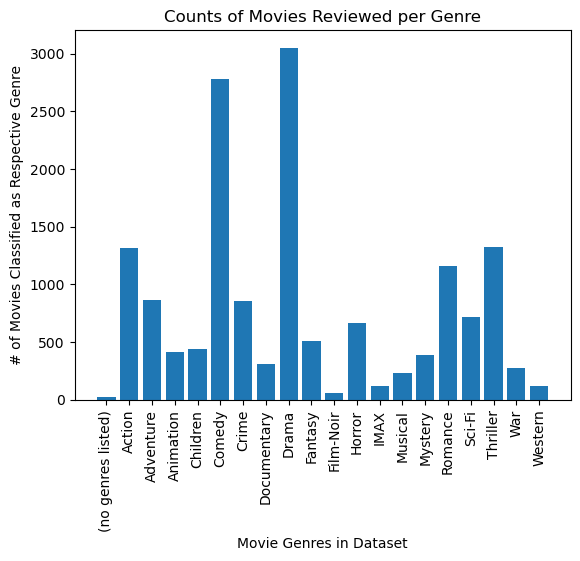

In [363]:
#Create a list of dictionary keys/values
genres = list(genre_counts.keys())
counts = list(genre_counts.values())

#Make a barplot using 
plt.bar(range(len(genre_counts)), counts, tick_label=genres)
plt.xticks(rotation = 90)
plt.xlabel('Movie Genres in Dataset')
plt.ylabel('# of Movies Classified as Respective Genre')
plt.title('Counts of Movies Reviewed per Genre')
plt.show()

Looks like most movies are considered comedies or dramas. However, it is important to note that most movies had more than 1 genre classification.

**Save clean data to csv**

In [364]:
#Save filtered movies_overview data to csv file
movie_data_clean.to_csv('./clean_data/movie_data_clean.csv', index = False)

In [365]:
#Save user_ratings to csv file
user_ratings_clean.to_csv('./clean_data/user_ratings_clean.csv', index = False)